In [16]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
import os

## Gathering Data

In [17]:
twitarch_df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [18]:
# https://developer.twitter.com/en/docs/authentication/guides/authentication-best-practices
consumer_key = os.environ.get("CONSUMER_KEY")
consumer_secret = os.environ.get("CONSUMER_SECRET")

# from http://docs.tweepy.org/en/latest/getting_started.html
# using Oauth 2
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
# https://knowledge.udacity.com/questions/66949#66975
api = tweepy.API(auth_handler = auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

```
Rate limit reached. Sleeping for: 607
Rate limit reached. Sleeping for: 606
```

### code above ran for 32 minutes
I started execution at 14:30 on 2020-08-24 (Aug 24 2020). It finished around 15:02

In [19]:
# get the info from json object that will be merged with original df
added_features = []

with open('tweet_json.txt', 'r') as file:
    for item in file:
        data = json.loads(item)
        added_features.append({'tweet_id': data['id'],
                               'favorite_count': data['favorite_count'],
                               'retweet_count': data['retweet_count']})

added_fields = pd.DataFrame(added_features)

### The project details gave 2 different URLs for the image predictions data. I will compare the 2 below.

In [20]:
# project gave us 2 different links. They are identical
!diff -s image_predictions.tsv image_predictions_2.tsv

Files image_predictions.tsv and image_predictions_2.tsv are identical


### Since the 2 image_predictions files are identical, I will use the file extracted from first URL.

In [21]:
imagepred_df = pd.read_csv('image_predictions.tsv', sep='\t')

-----------------------

## Assess Data

In [22]:
twitarch_df.info()
twitarch_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
# Are all the tweet_ids unique?
print(f"There are {twitarch_df.shape[0]} entries and there are {twitarch_df.tweet_id.nunique()} unique tweet_ids")

There are 2356 entries and there are 2356 unique tweet_ids


All tweet_ids are unique since there are 2356 entries and there are 2356 unique IDs

In [24]:
added_fields.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35783,7568
1,892177421306343426,30896,5607
2,891815181378084864,23249,3714
3,891689557279858688,39055,7746
4,891327558926688256,37301,8346


In [25]:
imagepred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:

imagepred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
twitarch_df[twitarch_df['text'].str.contains('pupper', regex=True) & (twitarch_df['pupper'] != 'pupper')].count()

tweet_id                      24
in_reply_to_status_id          1
in_reply_to_user_id            1
timestamp                     24
source                        24
text                          24
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 24
rating_numerator              24
rating_denominator            24
name                          24
doggo                         24
floofer                       24
pupper                        24
puppo                         24
dtype: int64

In [28]:
twitarch_df['text'].str.contains('doggo|pupper|puppo|floofer').sum()

399

In [29]:
twitarch_df[(twitarch_df['text'].str.contains('^RT', regex=True)) & (twitarch_df['retweeted_status_id'].isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1286,708400866336894977,NaN,NaN,2016-03-11 21:15:02 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",RT if you are as ready for summer as this pup ...,NaN,NaN,NaN,https://vine.co/v/iHFqnjKVbIQ,12,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None


In [42]:
twitarch_df[twitarch_df['text'].str.contains('doggo|pupper|puppo|floofer') & (twitarch_df['doggo'] == 'None') & (twitarch_df['floofer'] == 'None') & (twitarch_df['pupper'] == 'None') & (twitarch_df['puppo'] == 'None')].count()

tweet_id                      41
in_reply_to_status_id          3
in_reply_to_user_id            3
timestamp                     41
source                        41
text                          41
retweeted_status_id            2
retweeted_status_user_id       2
retweeted_status_timestamp     2
expanded_urls                 39
rating_numerator              41
rating_denominator            41
name                          41
doggo                         41
floofer                       41
pupper                        41
puppo                         41
dtype: int64

In [38]:
twitarch_df[twitarch_df['doggo'] == 'None'].count()

tweet_id                      2259
in_reply_to_status_id           74
in_reply_to_user_id             74
timestamp                     2259
source                        2259
text                          2259
retweeted_status_id            171
retweeted_status_user_id       171
retweeted_status_timestamp     171
expanded_urls                 2203
rating_numerator              2259
rating_denominator            2259
name                          2259
doggo                         2259
floofer                       2259
pupper                        2259
puppo                         2259
dtype: int64

In [35]:
twitarch_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Clean data

In [418]:
# make copies
twitarch_work = twitarch_df.copy()
#imagepred_work = imagepred_df.copy()
#addedfields_work = added_fields.copy()

In [419]:
# according to project details drop "no retweets" when it comes to original ratings
# I will not drop them in the meantime
retweets = twitarch_work[twitarch_work.retweeted_status_id.notnull()].index
retweets[:5]

Int64Index([19, 32, 36, 68, 73], dtype='int64')

In [420]:
#twitarch_work.set_index('tweet_id')
#twitarch_work.head(3)
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']

In [421]:
#temp = twitarch_work[dog_stage]

In [422]:
#twitarch_work.replace(to_replace={'None': None}, value=None, method=None, inplace=True)
for ds in dog_stage:
    twitarch_work[ds].replace({'None': np.nan}, inplace=True)

In [423]:
twitarch_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

In [167]:
#temp[dog_stage].notnull().sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [424]:
# create a new column that sums by row the dog_stages
twitarch_work['ds_sum'] = twitarch_work[dog_stage].notnull().sum(axis=1)

In [425]:
twitarch_work[dog_stage + ['ds_sum']].head()

,doggo,floofer,pupper,puppo,ds_sum
0,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,0


In [426]:
#twitarch_work[twitarch_work.ds_sum > 1].count()

In [427]:
# get all the indices of specific dog stages, then write into cell the dog stage
for ds in dog_stage:
    tidx = twitarch_work[(twitarch_work.text.str.contains(ds, case=False)) & (twitarch_work['ds_sum'] == 0)].index
    # for all the indices found for that dog stage, write the dog stage
    twitarch_work.loc[tidx, ds] = ds

In [428]:
# do the same as creation of the column ds_sum above but this time accounting for the recent additions just above
twitarch_work['ds_sum'] = twitarch_work[dog_stage].notnull().sum(axis=1) # sum the 4 dog_stage

In [429]:
#twitarch_work.to_csv('twitarch_work.csv', index=False)

In [430]:
# verify that text containing a dog stage are accounted for
twitarch_work[(twitarch_work.text.str.contains('doggo|pupper|puppo|floofer', case=False)) & (twitarch_work['ds_sum'] == 0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ds_sum


In [431]:
ds_counts = []
for ds in dog_stage:
    ds_counts.append(twitarch_work[ds].value_counts()[0])
ds_counts

[107, 10, 283, 37]

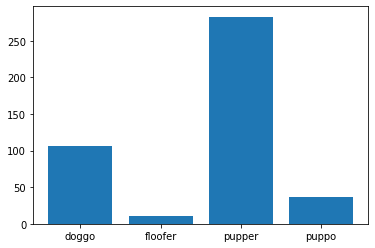

In [432]:
# Let us see a quick visual of frequency of dog stages. It did not matter to me if some tweets had content in more than one dog stage

import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(dog_stage, ds_counts);

In [433]:
# create a new column to combine content from the 4 columns of dog stages
combo_idx = twitarch_work[twitarch_work.ds_sum > 1].index
# casting was more complicated than usual. I got help from: https://stackoverflow.com/questions/60529588/how-can-i-cast-a-pandas-string-column-to-the-new-nullable-int64-type
twitarch_work['dog_stage'] = twitarch_work['doggo'].fillna('').map(str) + twitarch_work['floofer'].fillna('').map(str) + twitarch_work['pupper'].fillna('').map(str) + twitarch_work['puppo'].fillna('').map(str)
# prefix the multiple dog stages with "combo"
twitarch_work.loc[combo_idx, 'dog_stage'] = 'combo-' + twitarch_work['dog_stage']
#twitarch_work[twitarch_work.ds_sum == 0].loc['dog_stage'] = 'None'
twitarch_work['dog_stage'].replace({'': 'None'}, inplace=True)

In [434]:
twitarch_work.dog_stage.value_counts()

None                  1933
pupper                 271
doggo                   93
puppo                   36
combo-doggopupper       12
floofer                  9
combo-doggopuppo         1
combo-doggofloofer       1
Name: dog_stage, dtype: int64

In [435]:
twitarch_work.to_csv('twitarch_work.csv', index=False)

### Clean dog names

In [436]:
xtm = twitarch_work.name.value_counts()
print(type(xtm))
xtm_df = xtm.to_frame()
print(type(xtm_df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [437]:
xtm_df.head()

,name
None,745
a,55
Charlie,12
Cooper,11
Lucy,11


In [438]:
xtm_df.sort_index(axis=0, inplace=True) # sorting by index which happens to be the names of dogs

In [439]:
xtm_df.head()

,name
Abby,2
Ace,1
Acro,1
Adele,1
Aiden,1


In [440]:
#xtm_df.to_csv('dog_names.csv', index=True)

In [441]:
xtm_df.tail(30)

,name
Ziva,1
Zoe,1
Zoey,3
Zooey,1
Zuzu,1
a,55
actually,2
all,1
an,7
by,1


### It seems that all the "real" names of the dogs are capitalized. The non-capitalized names are most likely accidental entries.

In [442]:
twitarch_work['name'].replace(to_replace=r'^[a-z]+', value='None', regex=True, inplace=True)
#twitarch_work['name'].replace({'a': 'None'}, inplace=True)

In [443]:
xtm2 = twitarch_work['name'].value_counts()

In [444]:
xtm2_df = xtm2.to_frame()

In [445]:
xtm2_df.sort_index(axis=0, inplace=True)
xtm2_df.tail(30)

,name
Walker,1
Wallace,3
Wally,2
Walter,4
Watson,2
Wesley,1
Wiggles,1
Willem,1
William,1
Willie,1


In [446]:
twitarch_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       107 n

### clean timestamp

In [449]:
#pd.to_datetime(twitarch_work['timestamp']) #twitarch_work['Date']
# source: https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
twitarch_work['timestamp'] = twitarch_work.timestamp.astype('datetime64[ns]')

In [450]:
twitarch_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### clean expanded_urls
#### I have absolutely no idea what expanded_urls are but visually it looks like that there could be a url with this form: https://twitter.com/dog_rates/status/tweet_id.

In [467]:
# created a new column that is a string copy of the tweet_id in order for me to concatenate the strings in expanded_urls
# twitarch_work['tweet_id_str'] = twitarch_work.tweet_id.astype('str')
twitarch_work.expanded_urls.fillna('https://twitter.com/dog_rates/status/' + twitarch_work['tweet_id_str'], inplace=True)

In [468]:
twitarch_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2356 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

## clean rating_numerator and rating_denominator

In [473]:
twitarch_work['rating_denominator'][twitarch_work.rating_denominator != 10].count()

23

### There are only 23 rows that rating denominator is not 10. I will handle each case with regular expressions

In [474]:
zzz = twitarch_work[twitarch_work.rating_denominator != 10]
zzz

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ds_sum,dog_stage,tweet_id_str
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,https://twitter.com/dog_rates/status/835246439529840640,960,0,None,NaN,NaN,NaN,NaN,0,None,835246439529840640
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832088576586297345,11,15,None,NaN,NaN,NaN,NaN,0,None,832088576586297345
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,NaN,NaN,NaN,NaN,0,None,820690176645140481
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,NaN,NaN,NaN,0,None,810984652412424192
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,NaN,NaN,NaN,NaN,0,None,775096608509886464
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,NaN,NaN,NaN,NaN,0,None,758467244762497024
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,NaN,NaN,NaN,NaN,0,None,740373189193256964
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,None,doggo,NaN,NaN,NaN,1,doggo,731156023742988288
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://

In [476]:
zzz.to_csv('denominator.csv', index=True)

In [477]:
zzz.index

Int64Index([ 313,  342,  433,  516,  784,  902, 1068, 1120, 1165, 1202, 1228,
            1254, 1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843,
            2335],
           dtype='int64')

### I could do the easy way and just give the median as the numerator and 10 as the denominator. But I will do it the hard way first with regular expressions: first find in text of any possible rating, then extract

In [497]:
import re

In [519]:
pat = re.compile('(\d+)\/10') # find in text if there is ##/10
pat2 = re.compile('(\d+)\/(\d+)\D+\D') # find if there is anynumber/anynumber

In [524]:
# regular expression
for idx in zzz.index:
    string = twitarch_work.loc[idx, 'text']
    rate = pat.search(string)
    rate2 = pat2.search(string)
    if rate:
        numerator = rate.groups()[0]
    elif rate2:
        #numerator = rate2.groups()
        numerator = int(rate2.groups()[0]) * 10 / int(rate2.groups()[1])
    else:
        numerator = twitarch_work.rating_numerator.median() # I am giving this the median score as shown in describe

    twitarch_work.loc[idx, 'rating_numerator'] = int(numerator)
    twitarch_work.loc[idx, 'rating_denominator'] = 10

In [525]:
twitarch_work['rating_denominator'][twitarch_work.rating_denominator != 10].count()

0

In [526]:
twitarch_work.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,ds_sum
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.0,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,12.230475,10.0,0.185484
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,40.825702,0.0,0.403774
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.0,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.0,0.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.0,0.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.0,0.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,10.0,2.000000


In [532]:
twitarch_work.rating_numerator.median()

11.0

In [533]:
twitarch_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2356 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

## addedfields_work = added_fields.copy()